**DATASET**

The both training and evaluation operations would be handled with [Fec2013](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data) dataset. Compressed version of the dataset takes 92 MB space whereas uncompressed version takes 295 MB space. There are 28K training and 3K testing images in the dataset. Each image was stored as 48×48 pixel. The pure dataset consists of image pixels (48×48=2304 values), emotion of each image and usage type (as train or test instance).

In [1]:
#------------------------------
#read kaggle facial expression recognition challenge dataset (fer2013.csv)
#https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# #Unzipping the file
# !tar -xf /content/drive/My\ Drive/fer2013.tar.gz

In [18]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.models import Sequential
from keras.metrics import categorical_accuracy
from keras.models import model_from_json
from keras.callbacks import ModelCheckpoint
from keras.optimizers import *
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import matplotlib.pyplot as plt

In [22]:
#variables
num_classes = 7 #angry, disgust, fear, happy, sad, surprise, neutral
batch_size = 256
epochs = 100


with open("fer2013/fer2013.csv") as f:
  content = f.readlines()

lines = np.array(content)

num_of_instances = lines.size
print("number of instances: ",num_of_instances)
print("instance length: ",len(lines[1].split(",")[1].split(" ")))

#------------------------------
#initialize trainset and test set
x_train, y_train, x_test, y_test = [], [], [], []

#------------------------------
#transfer train and test set data
for i in range(1,num_of_instances):
    try:
        emotion, img, usage = lines[i].split(",")

        val = img.split(" ")

        pixels = np.array(val, 'float32')

        emotion = keras.utils.to_categorical(emotion, num_classes)

        if 'Training' in usage:
            y_train.append(emotion)
            x_train.append(pixels)
        elif 'PublicTest' in usage:
            y_test.append(emotion)
            x_test.append(pixels)
    except:
      print("", end="")

#------------------------------
#data transformation for train and test sets
x_train = np.array(x_train, 'float32')
y_train = np.array(y_train, 'float32')
x_test = np.array(x_test, 'float32')
y_test = np.array(y_test, 'float32')

x_train /= 255 #normalize inputs between [0, 1]
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_train = x_train.astype('float32')
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)
x_test = x_test.astype('float32')

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

number of instances:  35888
instance length:  2304
28709 train samples
3589 test samples


In [40]:
def my_model():
    model = Sequential()
    input_shape = (48,48,1)
    model.add(Conv2D(64, (5, 5), input_shape=input_shape,activation='relu', padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')
    # UNCOMMENT THIS TO VIEW THE ARCHITECTURE
    #model.summary()

    return model
model=my_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 48, 48, 64)        1664      
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 batch_normalization_8 (Bat  (None, 48, 48, 64)        256       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 24, 24, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 24, 24, 128)       204928    
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 128)      

In [41]:
#------------------------------
#batch process
gen = ImageDataGenerator()
train_generator = gen.flow(x_train, y_train, batch_size=batch_size)

#------------------------------

model.compile(loss='categorical_crossentropy'
    , optimizer=tf.keras.optimizers.Adam()
    , metrics=['accuracy']
)

#------------------------------

In [ ]:
fit = False

if fit == True:
	#model.fit_generator(x_train, y_train, epochs=epochs) #train for all trainset
	model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one
else:
	model.load_weights('/content/drive/MyDrive/model2.h5') #load weights

<ipython-input-42-2aa102fb5640>:5: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=batch_size, epochs=epochs) #train for randomly selected one


Epoch 1/100
256/256 [==============================] - 33s 124ms/step - batch: 127.5000 - size: 254.2891 - loss: 1.6013 - acc: 0.3817
Epoch 2/100
256/256 [==============================] - 32s 126ms/step - batch: 127.5000 - size: 253.4336 - loss: 1.1392 - acc: 0.5692
Epoch 3/100
256/256 [==============================] - 33s 129ms/step - batch: 127.5000 - size: 254.2891 - loss: 0.8106 - acc: 0.7035
Epoch 4/100
256/256 [==============================] - 33s 130ms/step - batch: 127.5000 - size: 254.2891 - loss: 0.4607 - acc: 0.8402
Epoch 5/100
256/256 [==============================] - 33s 129ms/step - batch: 127.5000 - size: 253.4336 - loss: 0.1901 - acc: 0.9426
Epoch 6/100
256/256 [==============================] - 33s 129ms/step - batch: 127.5000 - size: 254.2891 - loss: 0.0839 - acc: 0.9782
Epoch 7/100
256/256 [==============================] - 33s 129ms/step - batch: 127.5000 - size: 254.2891 - loss: 0.0492 - acc: 0.9888
Epoch 8/100
256/256 [==============================] - 33s 129

In [26]:
#Evaluation
train_score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', train_score[0])
print('Train accuracy:', 100*train_score[1])

test_score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', test_score[0])
print('Test accuracy:', 100*test_score[1])

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2335: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Train loss: 0.37807137252671236
Train accuracy: 91.29541516304016
Test loss: 0.4139597994864701
Test accuracy: 90.49874544143677


In [27]:
#------------------------------
#function for drawing bar chart for emotion preditions
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()
#------------------------------


In [10]:
# #Saving the model
# !cwd
# model.save('model25.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


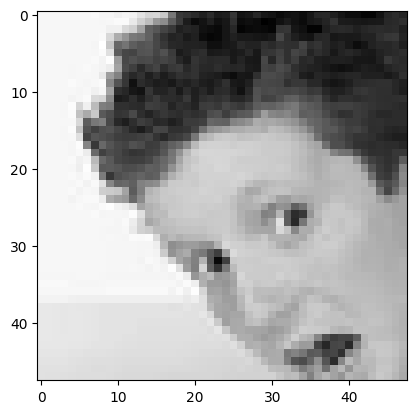

[8.9202431e-06 4.6003490e-09 9.9960750e-01 1.6590290e-06 4.2066960e-05
 1.0754409e-05 3.2913499e-04]


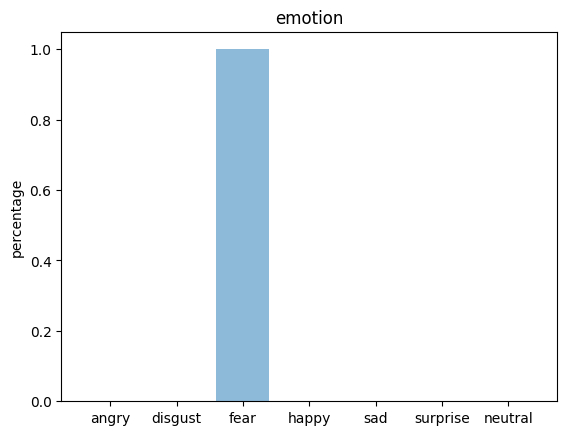

----------------------------------------------


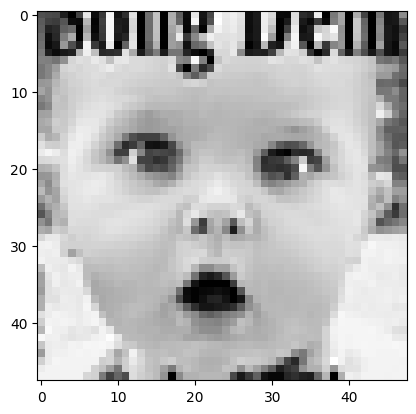

[3.59913523e-11 1.08474827e-13 6.68112605e-08 4.84031537e-10
 1.06134556e-13 9.99998569e-01 1.26323175e-06]


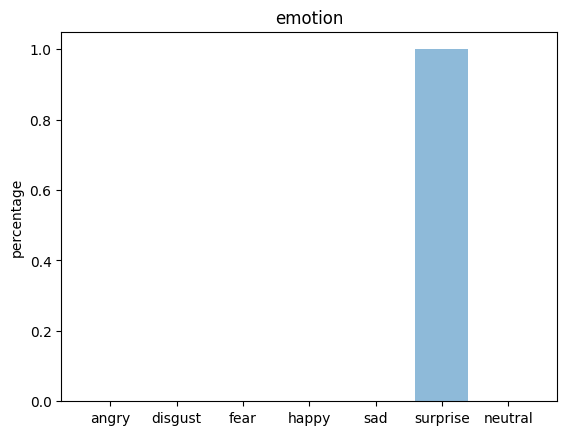

----------------------------------------------


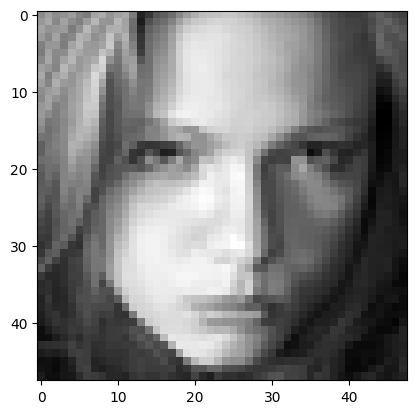

[3.3388513e-01 4.7131077e-09 9.0129121e-04 6.3217461e-01 8.3940513e-03
 1.2935566e-06 2.4643550e-02]


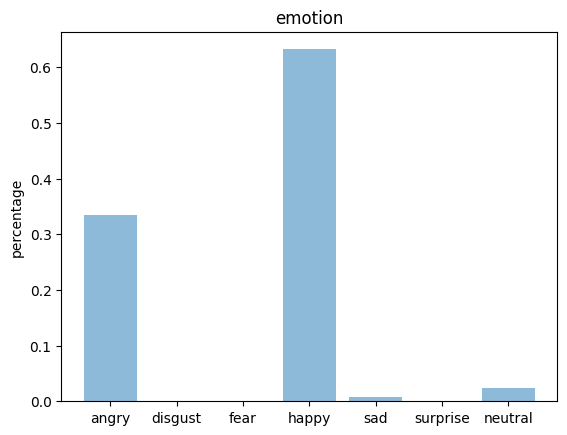

----------------------------------------------


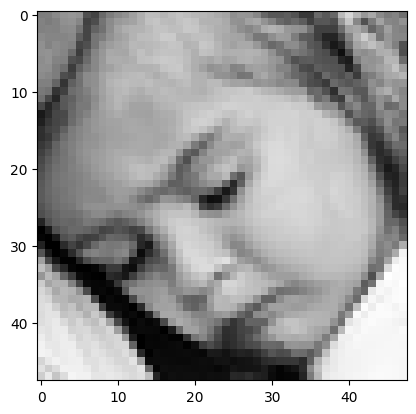

[1.0307819e-08 4.7977101e-11 4.7132453e-05 1.6517570e-05 9.9917489e-01
 9.6561919e-08 7.6135277e-04]


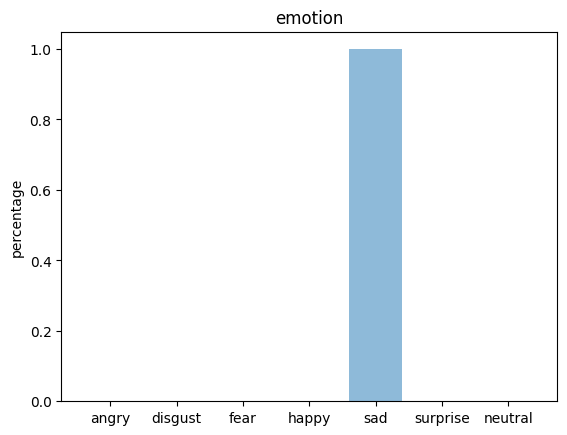

----------------------------------------------


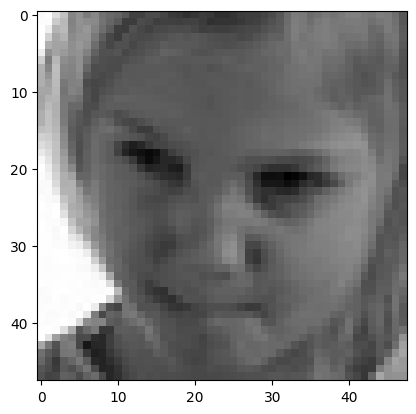

[9.0652019e-01 1.4037129e-05 3.2952409e-03 5.4393776e-02 1.5343587e-04
 2.9702173e-04 3.5326283e-02]


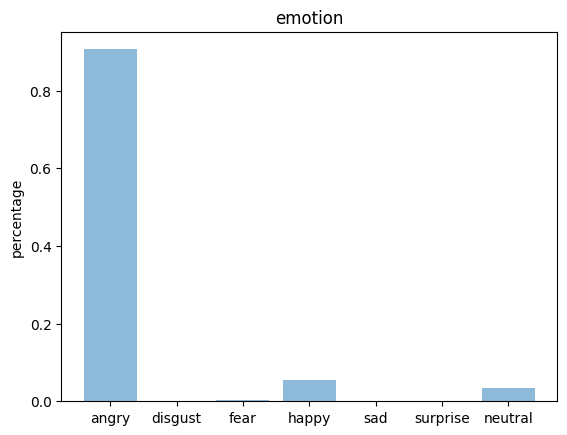

----------------------------------------------


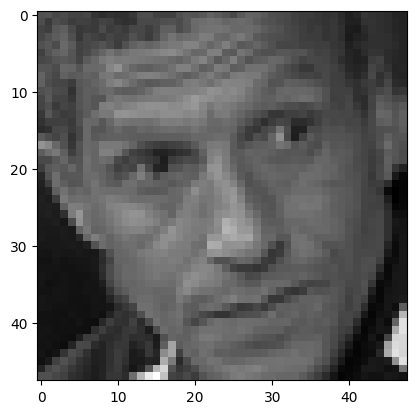

[1.7587531e-04 1.8302956e-09 9.9829191e-01 2.6440825e-05 4.7863837e-06
 1.4059260e-03 9.5065807e-05]


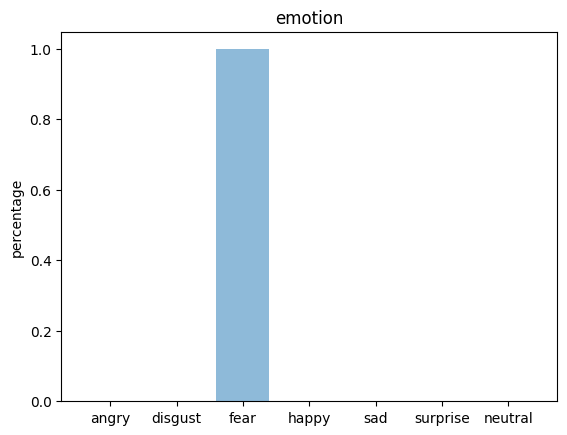

----------------------------------------------


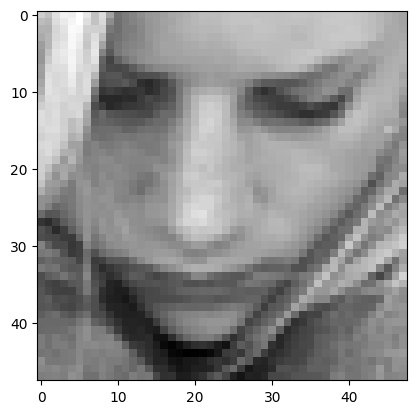

[1.8068412e-03 3.0125155e-10 7.8229277e-05 2.7966374e-04 4.7847295e-01
 2.3936275e-07 5.1936209e-01]


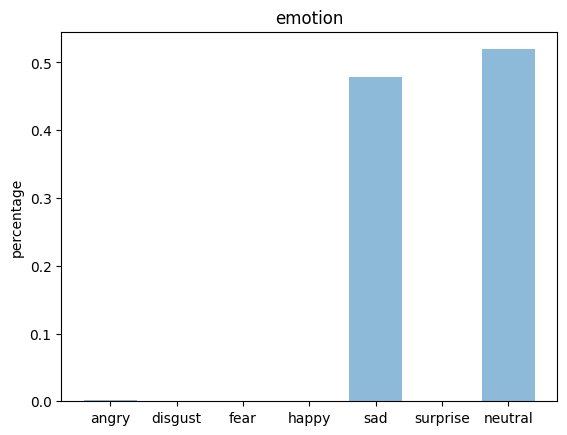

----------------------------------------------


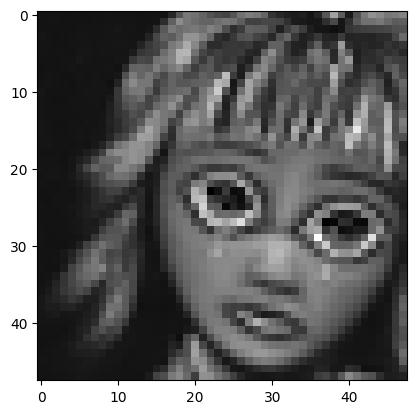

[3.3452943e-09 6.3656190e-12 4.0275504e-06 1.5918404e-08 9.9999583e-01
 2.8702971e-09 8.0215663e-08]


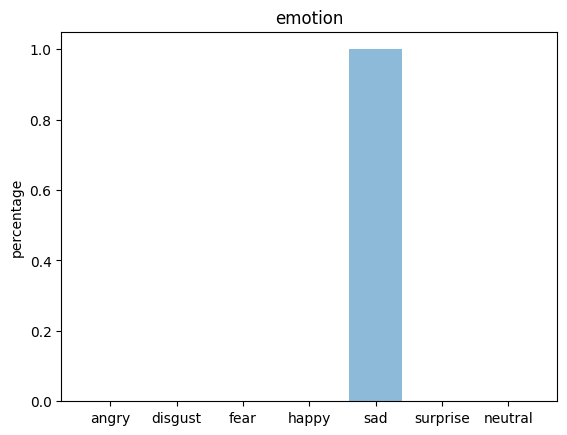

----------------------------------------------


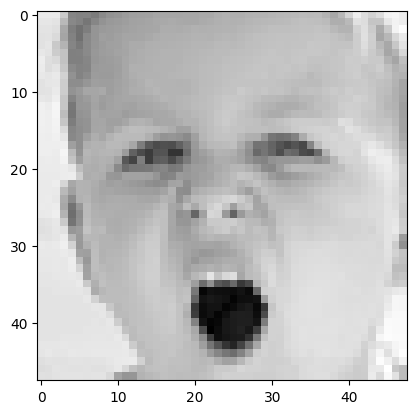

[4.7871789e-01 3.6830675e-06 3.0158516e-02 1.2019939e-04 1.6842399e-06
 4.8294207e-01 8.0560111e-03]


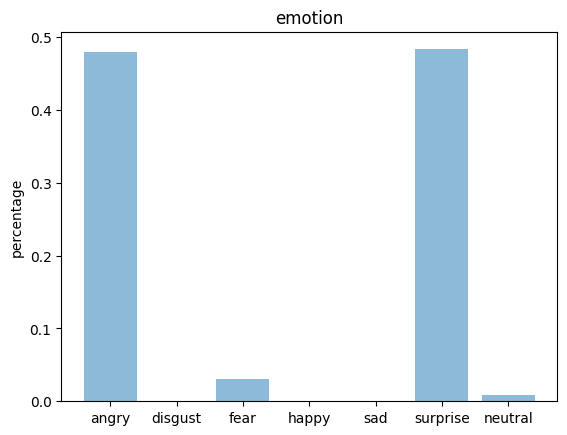

----------------------------------------------


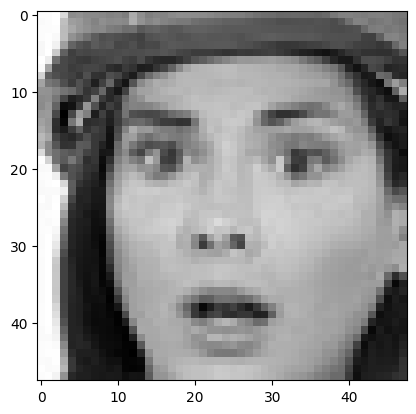

[1.0559274e-08 2.6052323e-09 9.9935478e-01 8.8479659e-09 8.9395093e-05
 1.7873812e-04 3.7709624e-04]


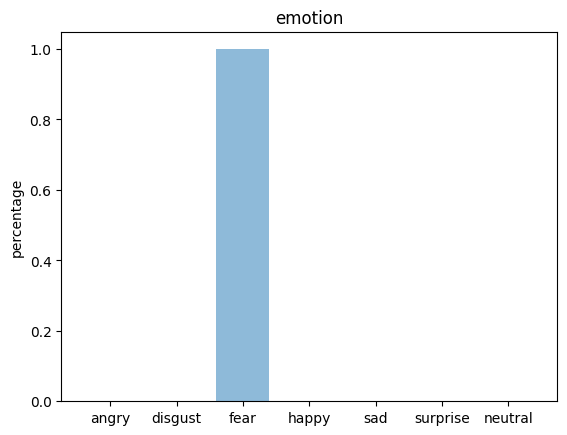

----------------------------------------------


In [28]:
monitor_testset_results = True

if monitor_testset_results == True:
	#make predictions for test set
	predictions = model.predict(x_test)

	index = 0
	for i in predictions:
		if index < 30 and index >= 20:
			#print(i) #predicted scores
			#print(y_test[index]) #actual scores

			testing_img = np.array(x_test[index], 'float32')
			testing_img = testing_img.reshape([48, 48]);

			plt.gray()
			plt.imshow(testing_img)
			plt.show()

			print(i)

			emotion_analysis(i)
			print("----------------------------------------------")
		index = index + 1

In [29]:
#Confusion Matrix.

from sklearn.metrics import classification_report, confusion_matrix

pred_list = []; actual_list = []

for i in predictions:

  pred_list.append(np.argmax(i))

for i in y_test:

  actual_list.append(np.argmax(i))

confusion_matrix(actual_list, pred_list)

array([[377,   0,  14,  20,  13,   4,  39],
       [  2,  49,   2,   2,   1,   0,   0],
       [  3,   0, 438,  10,  10,  13,  22],
       [  2,   0,   2, 866,   1,   6,  18],
       [  8,   0,  22,  22, 542,   3,  56],
       [  1,   0,   2,   7,   1, 396,   8],
       [  1,   0,   7,   8,   9,   2, 580]])

In [30]:
# from keras.models import load_model
# model = load_model('model25.h5')

In [31]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')

    plt.show()

In [32]:
#CODE for Capturing an image on Colab from here: https://colab.research.google.com/notebook#fileId=1OnUy6eFE7XhdfGfAHDCqQxpwueTOj_NO

from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [35]:
take_photo()

<IPython.core.display.Javascript object>

'photo.jpg'

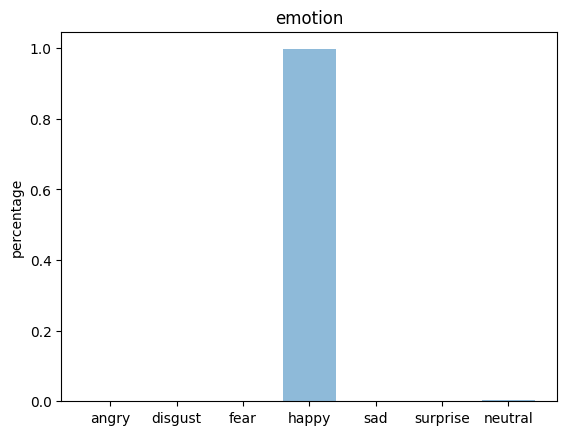

None


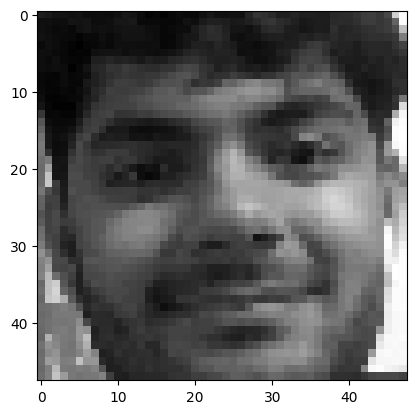

In [36]:
import cv2
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

def crop_face(filepath):
    # Load the Haar Cascade for face detection
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

    # Read the image and convert to grayscale
    img = cv2.imread(filepath)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    if len(faces) == 0:
        return None

    # Assuming the first face is the target (you might want to change this)
    (x, y, w, h) = faces[0]

    # Crop and resize the face region
    face = gray[y:y+h, x:x+w]
    face = cv2.resize(face, (48, 48))
    return face

# File path
file = 'photo.jpg'

# Crop the face
cropped_face = crop_face(file)

if cropped_face is not None:
    # Prepare the image for the model
    x = np.array(cropped_face, 'float32')
    x = np.expand_dims(x, axis=0)
    x = np.expand_dims(x, axis=-1)
    x /= 255

    # Predict emotion
    custom = model.predict(x)
    emotion_label = emotion_analysis(custom[0])

    print(emotion_label)

    # Display the cropped face
    plt.gray()
    plt.imshow(cropped_face)
    plt.show()
else:
    print("No face detected")
